# training and testing a model
Initially I'll pick 80% training 20% testing as its industry standard

mean: 67.04422940150715, median: 55.99713189163489


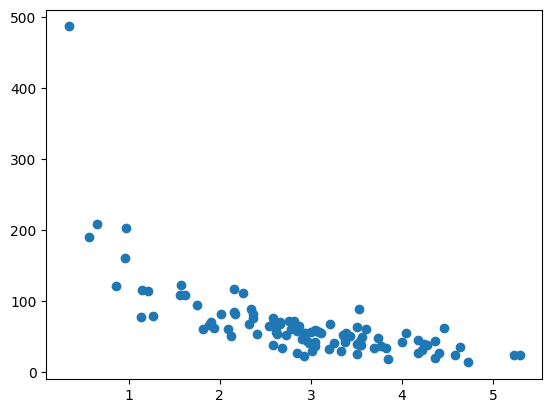

In [7]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

print(f"mean: {numpy.mean(y)}, median: {numpy.median(sorted(y))}")
plt.scatter(x, y)
plt.show()

In [8]:
SPLIT_VALUE = 80

train_x = x[:SPLIT_VALUE]
train_y = y[:SPLIT_VALUE]

test_x = x[SPLIT_VALUE:]
test_y = y[SPLIT_VALUE:]

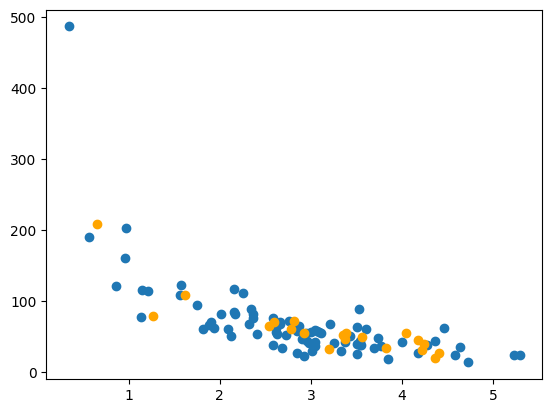

In [9]:
# import pandas as pd
# print(pd.DataFrame(train_x).describe)
plt.scatter(train_x, train_y, label="training data")
plt.scatter(test_x, test_y, label="testing data", color="orange")
plt.show()

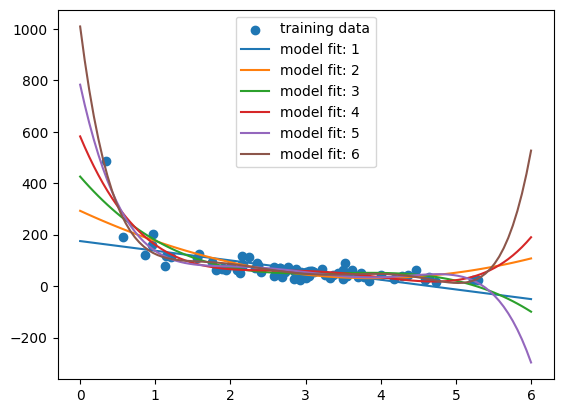

In [10]:
# data doesnt quite look like simple linear to me
# pick a polynomial model and see what it comes up with

MAX_X = 6
plt.scatter(train_x, train_y, label = "training data")
line_x = numpy.linspace(0, MAX_X, 100)

POLYFIT_DIMS = 6
for dim in range(1,POLYFIT_DIMS+1):
    model = numpy.poly1d(numpy.polyfit(train_x, train_y, dim))
    plt.plot(line_x, model(line_x), label = f"model fit: {dim}")

plt.legend()
plt.show()

In [11]:
# how well does the data fit the curve?
# R2 = 1 means the data can fit to a line perfectly
# R2 ~ 0.75 means there is some variation of the data that isnt accounted for by a best fit line
# R2 = 0 the variation in data is not captured by a best fit line

# need residuals for each point to the best fit line -> squared
# total sum squares -> sum distance from mean -> squared

# theres a functioni that will calculate it in sklearn.metrics

from sklearn.metrics import r2_score

for dim in range(1,POLYFIT_DIMS+1):
    model = numpy.poly1d(numpy.polyfit(train_x, train_y, dim))
    r2 = r2_score(train_y, model(train_x))
    print(f"model dim {dim}: r2 = {r2}")


model dim 1: r2 = 0.4348148677862512
model dim 2: r2 = 0.6304398951453632
model dim 3: r2 = 0.7359993168715481
model dim 4: r2 = 0.7988645544629798
model dim 5: r2 = 0.8491459755938982
model dim 6: r2 = 0.8748156419830277


0.9157298277696442


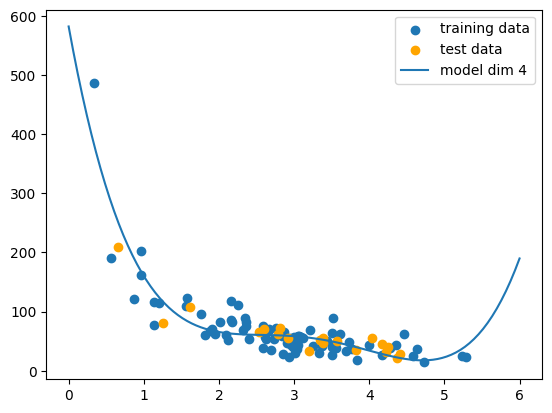

In [12]:
# model dim 4 has a decent r2 and doesnt look like it's over fitting up to about 5.2

# plot training data
plt.scatter(train_x, train_y, label = "training data")

# plot test data
plt.scatter(test_x, test_y, label = "test data", color = "orange")

# plot the model from training data, dim 4
model_trained = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))
plt.plot(line_x, model_trained(line_x), label = f"model dim 4")

# find the r2 of the model data compared to testing data
r2 = r2_score(test_y, model(test_x))
print(r2)

plt.legend()
plt.show()